<div style=" border-bottom: 8px solid #00B2FF; overflow: hidden; border-radius: 10px; height: 60px; width: 100%; display: flex;">
  <div style="height: 100%; width: 100%; background-color: #3800BB; float: left; text-align: center; display: flex; justify-content: left; align-items: center; font-size: 40px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">Visualization: Model Errors</span></b>
  </div>
</div>

<div class="alert" style="background-color: #FEDAD5; border-left: 8px solid #B12111; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h5 style="font-size: 16px; margin-bottom: 10px;">
    <strong> Contents </strong>
  </h5>
<hr>
  <p><font size="3" face="Arial" font-size="large"><ul type="square">  
  <li> Feature Importance </li>
  <li> SHAP values </li>
  <li> classification report </li>
  <li> Confusion Matrix </li>
  <li> Regression and Error (Actual and Predicted difference) </li>
  <li> (True - Pred) vs (True + Pred) visual </li>
  <li> Conclusion </li>
  </li></ul></font></p>

</div>

<img src='../imgs/03.4.02_1.JPG' width="1000" height="300" />

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

Visualization can help even after we have **already trained** a model.  
For example: 
* Understand what adds noise to the model or what can be added to make model more precise.
* Draw conclusions about how accuracy can be improved in further experiments.
* Visualize model errors
* Eliminate unnecessary features
* Find ideas for new features.

It all depends on the type of the data

</div>

<div class="alert alert-warning">

### **Import Packages and Overview Dataset**
</div>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from classes import Paths


import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Now you can import the utils module
import utils as u

In [2]:
paths = Paths()
path = paths.quickstart_train
df = pd.read_csv(path)
display(df.shape)
display(df.dtypes)
df.head(10)



(2337, 17)

car_id                       object
model                        object
car_type                     object
fuel_type                    object
car_rating                  float64
year_to_start                 int64
riders                        int64
year_to_work                  int64
target_reg                  float64
target_class                 object
mean_rating                 float64
distance_sum                float64
rating_min                  float64
speed_max                   float64
user_ride_quality_median    float64
deviation_normal_count        int64
user_uniq                     int64
dtype: object

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,4.74,"12,141,310.41",0.10,180.86,0.02,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,electro_bug,4.48,"18,039,092.84",0.00,187.86,12.31,174,174
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,34.93,gear_stick,4.77,"15,883,659.43",0.10,102.38,2.51,174,173
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,32.22,engine_fuel,3.88,"16,518,828.77",0.10,172.79,-5.03,174,170
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,27.51,engine_fuel,4.18,"13,983,174.66",0.10,203.46,-14.26,174,171
5,b12101843B,Skoda Rapid,economy,petrol,2.36,2013,42176,2018,48.99,engine_ignition,4.35,"10,855,890.99",0.10,180.89,-18.22,174,173
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.32,2012,24611,2014,54.72,engine_overheat,4.39,"8,343,280.33",0.10,174.98,12.32,174,167
7,O-2124190y,Tesla Model 3,premium,electro,3.90,2017,116872,2019,50.40,gear_stick,4.71,"9,793,288.03",0.10,95.89,-8.94,174,139
8,h16895544p,Kia Sportage,standart,petrol,3.50,2014,56384,2017,33.59,gear_stick,4.51,"16,444,046.89",0.32,101.80,-1.16,174,170
9,K77009462l,Smart ForFour,economy,petrol,4.56,2013,41309,2018,39.04,gear_stick,4.38,"6,975,742.48",0.10,125.25,3.77,174,173


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq,random_feature_1,random_feature_2,random_feature_3
1377,C88130543S,Hyundai Solaris,economy,petrol,4.26,2015,82124,2016,35.75,electro_bug,4.20,"14,021,420.19",0.00,184.51,9.51,174,174,0.82,-0.23,0
55,q11941907L,Skoda Rapid,economy,petrol,3.46,2017,111468,2017,57.58,engine_ignition,3.85,"10,140,081.85",0.10,188.94,4.21,174,173,0.20,0.82,71
725,i-7530121C,Smart ForFour,economy,petrol,5.48,2016,104945,2016,38.18,electro_bug,4.20,"14,728,947.22",0.00,191.61,-3.98,174,173,0.32,1.53,78
797,M-1351643L,Nissan Qashqai,standart,petrol,4.20,2013,40072,2019,86.58,another_bug,4.66,"13,042,257.20",0.10,171.47,-2.02,174,172,0.82,-1.08,68
111,R22777636m,Kia Rio X,economy,petrol,2.20,2012,22872,2022,23.03,wheel_shake,4.70,"13,137,940.34",0.10,126.01,-0.58,174,171,0.79,-0.87,92


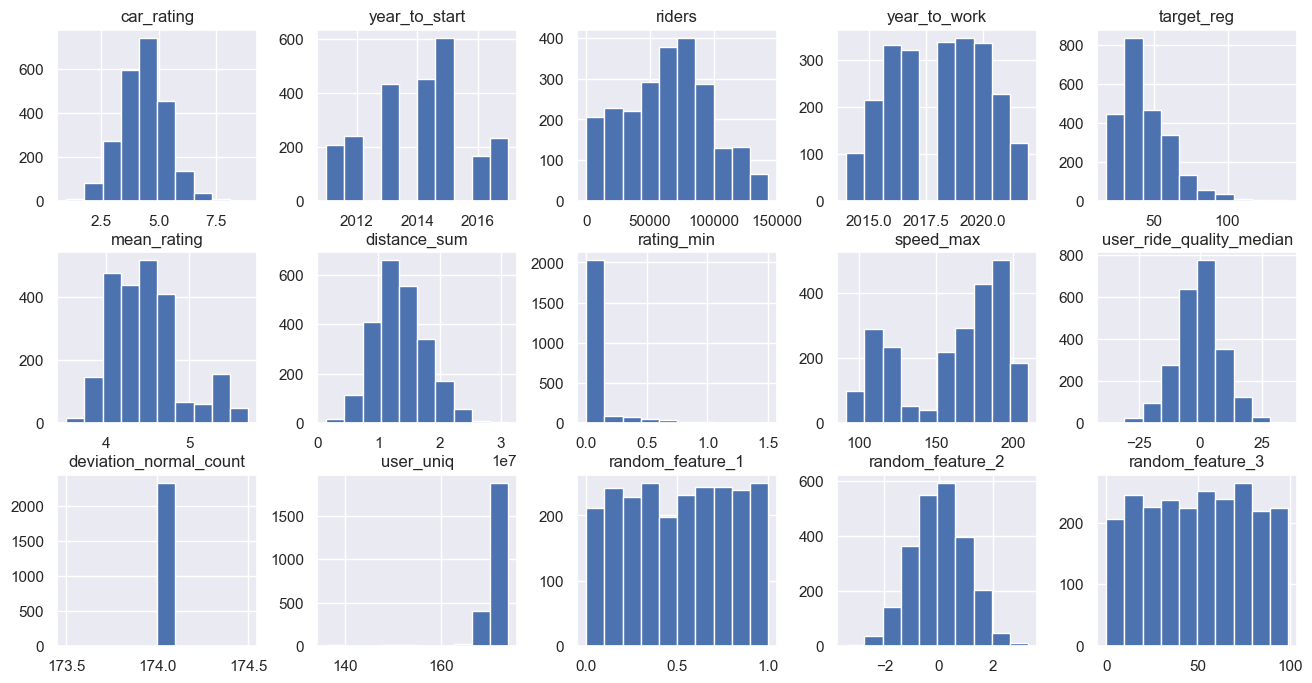

In [3]:
df['random_feature_1'] = np.random.random(size=df.shape[0])
df['random_feature_2'] = np.random.normal(size=df.shape[0])
df['random_feature_3'] = np.random.randint(100, size=df.shape[0])

df.hist(figsize=(16, 8)
        , layout=(-1, 5))
df.sample(5)

In [4]:
from sklearn.model_selection import train_test_split

drop_cols = ['user_id', 'car_id', 'ride_id', 'ride_date']
cat_cols = ['car_type', 'fuel_type', 'model']

y = df['target_class']
X = df.drop(columns=drop_cols + ['target_class', 'target_reg']
            , axis=1
            , errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size=0.2
                                                    , random_state=42)

<div class="alert alert-warning">

### **Classification**
</div>

In [5]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

clf = CatBoostClassifier(
    random_seed=9
  , thread_count=-1
  , use_best_model=True
  , cat_features=cat_cols
  , colsample_bylevel=0.1
  , subsample=0.95
  , bootstrap_type='Bernoulli'
)

clf.fit(
    X_train
    , y_train
    , eval_set=(X_test, y_test)
    , verbose=250
    , plot=False
    , early_stopping_rounds=100
)

print(clf.get_best_score())

Learning rate set to 0.109335
0:	learn: 2.0415376	test: 2.0431216	best: 2.0431216 (0)	total: 61.1ms	remaining: 1m
250:	learn: 0.3409030	test: 0.5505542	best: 0.5505382 (249)	total: 527ms	remaining: 1.57s
500:	learn: 0.2091452	test: 0.5443847	best: 0.5426824 (482)	total: 1.04s	remaining: 1.03s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5426824485
bestIteration = 482

Shrink model to first 483 iterations.
{'learn': {'MultiClass': 0.18269014634606076}, 'validation': {'MultiClass': 0.5426824484690956}}


<div class="alert alert-warning">

### **Visualize feature importance `CatBoost`**
</div>

In [6]:
# let's see the feature importances
fi = clf.get_feature_importance(prettified=True)
fi[:20].style.background_gradient(cmap='viridis', subset=pd.IndexSlice[0:10, 'Importances'])

,Feature Id,Importances
0,speed_max,35.760759
1,mean_rating,26.982665
2,rating_min,11.583517
3,user_uniq,4.294203
4,car_type,3.189167
5,model,2.468981
6,random_feature_3,2.275203
7,car_rating,1.948819
8,random_feature_2,1.913034
9,user_ride_quality_median,1.903386


<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

We should not trust this importance rating too much, because for highly correlated features, the importance is divided in half and they can both fly down in importance rating.

</div>

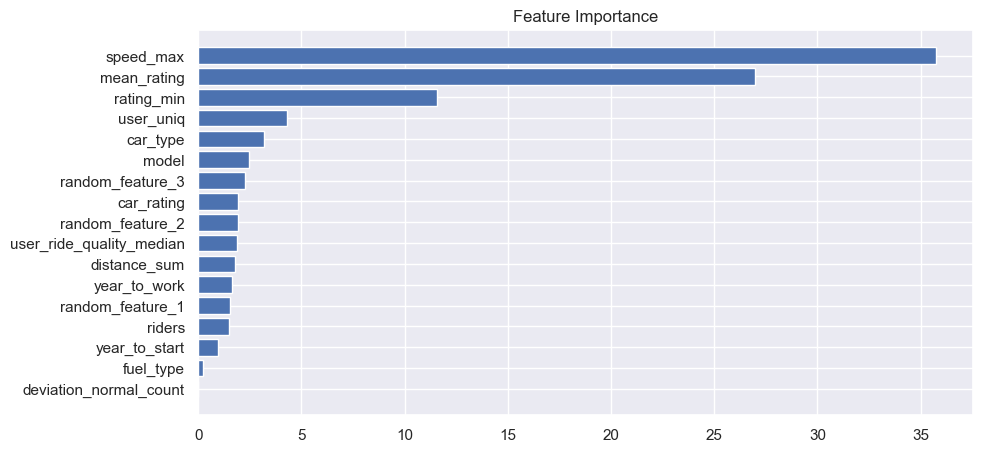

In [7]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

<div class="alert alert-warning">

### **Feature Importance plot using `Seaborn` cross validation**
</div>

In [8]:
from sklearn.model_selection import KFold

n_splits = 5
targets = ['target_class']
clfs = []
scores = []
kf = KFold(n_splits=n_splits, shuffle=True, random_state=7575)
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    train_dataset = Pool(data=X_train, label=y_train, cat_features=cat_cols)
    eval_dataset = Pool(data=X_test, label=y_test, cat_features=cat_cols)

    clf = CatBoostClassifier(random_seed=9,
                        thread_count=-1,
                        use_best_model=True,
                        cat_features=cat_cols,
                        colsample_bylevel =  0.1,
                        subsample = 0.95,
                        bootstrap_type='Bernoulli',)

    clfs.append(clf)

    clf.fit(train_dataset, eval_set=eval_dataset,
            verbose = False, use_best_model = True, plot = False)

    scores.append(np.mean([v for k, v in clf.best_score_['validation'].items()], dtype = 'float16'))
    
print('mean recall score --------->', np.mean(scores, dtype = 'float16'), np.std(scores, dtype = 'float16'))

mean recall score ---------> 0.5 0.0251


<div class="alert" style="background-color: #FEDAD5; border-left: 8px solid #B12111; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

<h3>

**A function for displaying the spread of feature importance by folds**

</h3>

</div>

17 features in total, averaged by 5models: 
14 features are shown on graph


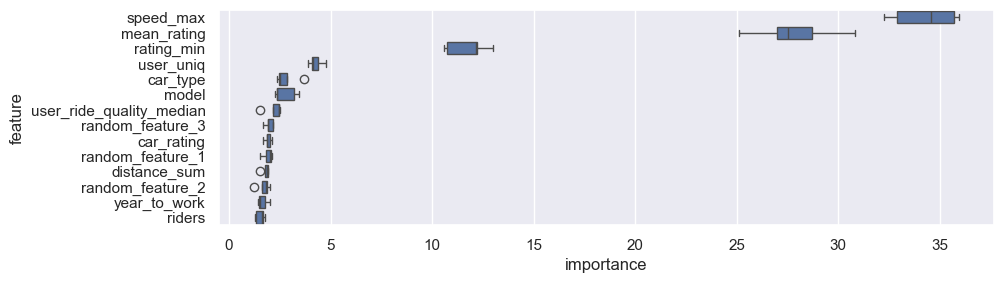

In [9]:
# plot importance of all folds at once and see top-14 features
df_feats_imp = u.plot_importance(X, clfs, height = 0.20, top_n = 14)

<div class="alert" style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">
  
  **Let's look at the feature importance plots of more accurate methods.**

</div>

<div class="alert alert-warning">

### **Permutation Importance**
</div>

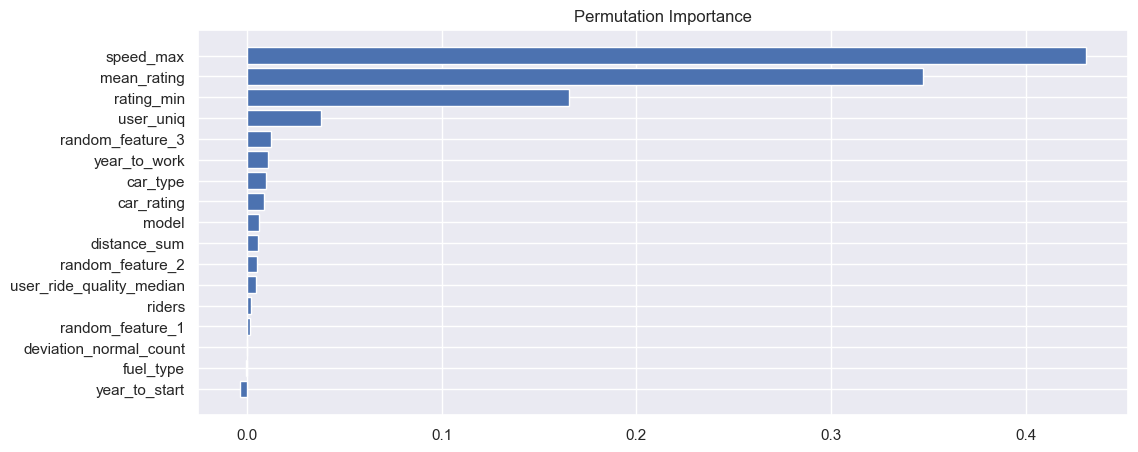

In [10]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 5))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance');

<img src='../imgs/03.4.02_2.png'/>

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

**In the SHAP library, Shapley values are calculated to assess the importance of features (the package is named after the American mathematician), it has rich visualization functionality that helps to explain the model easily and simply.**

**To assess the importance of the feature, the predictions of the model with and without this feature are evaluated.**

</div>

In [11]:
# The shap library can be capricious to install and may conflict with other packages
# Sometimes this set of commands helps
#!pip uninstall opencv-python -y -q
#!pip install opencv-python shap -q

In [12]:
import shap
shap.initjs()

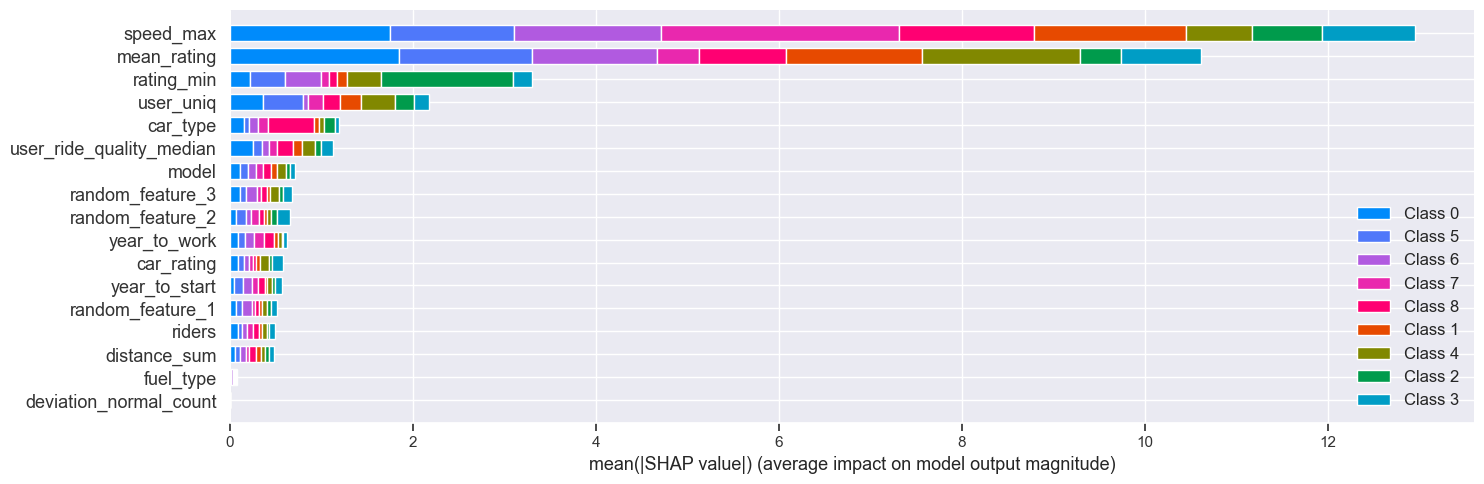

In [13]:
# we can see the impact of features on all classes
explainer = shap.TreeExplainer(clf)

val_dataset = Pool(data=X_test, label=y_test, cat_features=cat_cols)
shap_values = explainer.shap_values(val_dataset)
shap.summary_plot(shap_values, X_test, max_display = 25, plot_size = (15, 5))

Class 0
another_bug


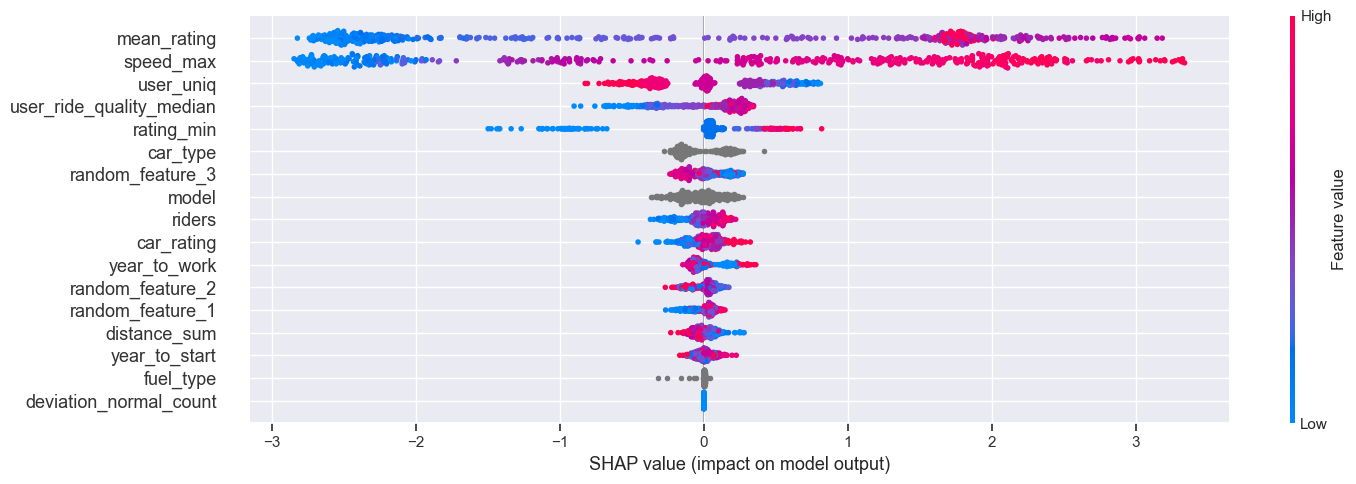

Class 1
break_bug


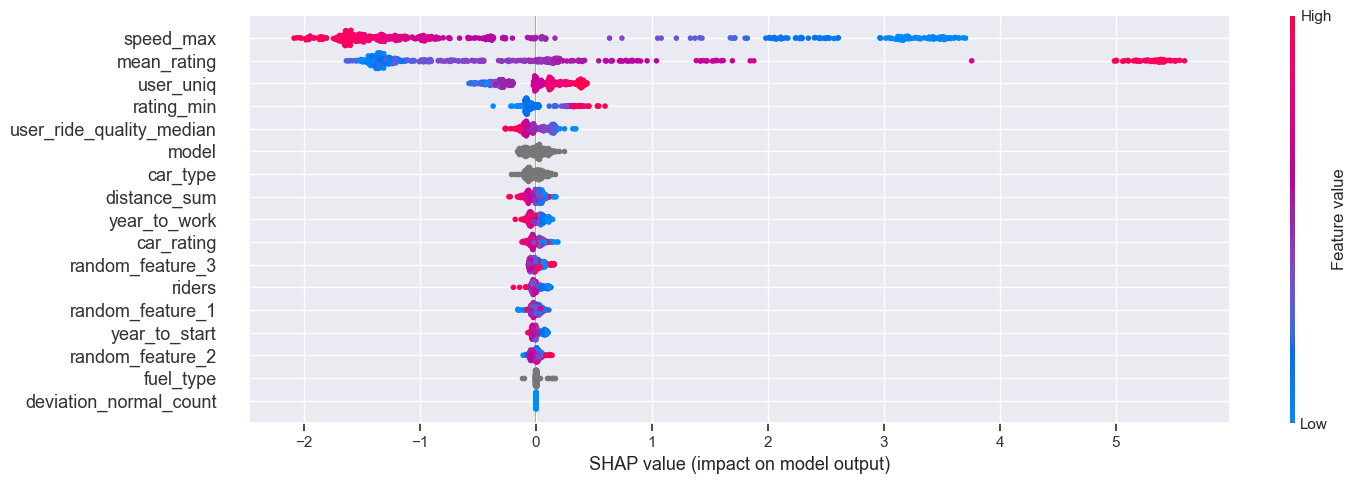

Class 2
electro_bug


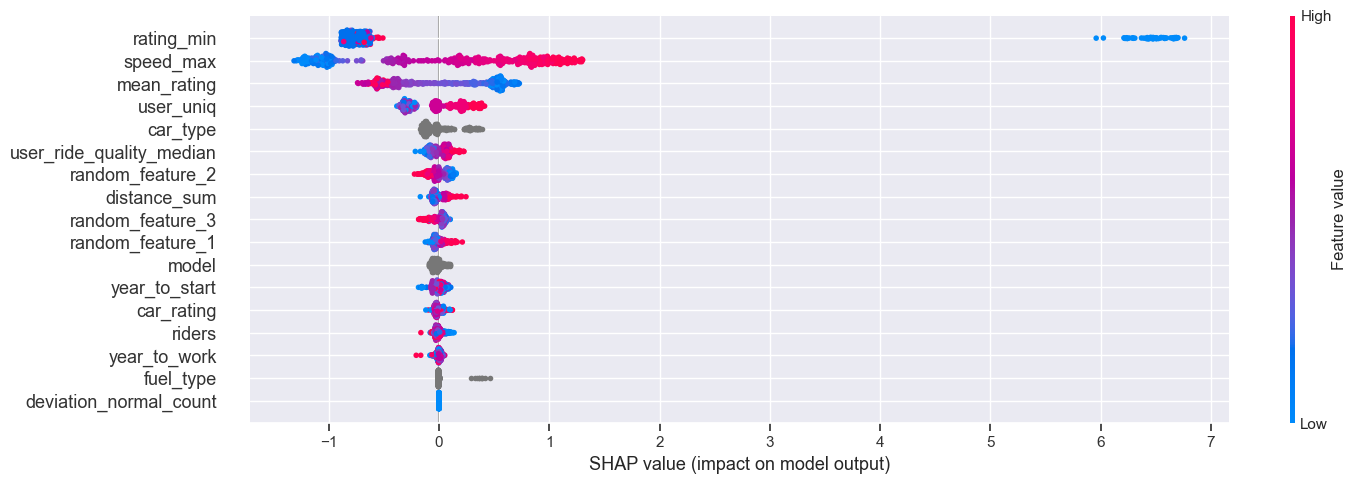

In [52]:
# or for each class separately
for i in range(len(np.unique(y.values))):
    print(f'Class {i}')
    print(np.unique(y.values)[i])
    shap.summary_plot(shap_values[i], X_test, color_bar=True, plot_size = (15, 5))
    if i == 2:
        break
# shap.summary_plot(shap_values[1], X_test, color_bar=False)

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

### **How to "read" the plot?**

* the values to the left of the central vertical line are **negative** class (0), to the right are **positive** (1)
* the thicker the line on the graph, the more such observation points there are
* the redder the dots on the graph, the higher the values of the feature in it.

</div>